In [1]:
import torch
import torchvision
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from model import ConvAutoEncoder
from data import DatasetCelebA

In [2]:
AE = ConvAutoEncoder(pretrained=True)

In [3]:
batch_size = 5

dataset = DatasetCelebA(root='./CelebA_subset/', attr='./CelebA_subset/list_attr_celeba.csv')
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True,num_workers=3)

In [4]:
def change_gender(model, dataloader, n_images=5, img_size=4, factors=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]):
    YOUNG_INDEX = 39
    BLOND_INDEX = 9
    ATTRACTIVE_INDEX = 2
    img, attrs = next(iter(dataloader))

    young_blond = torch.stack((attrs.data[:, YOUNG_INDEX],
                               attrs.data[:, BLOND_INDEX]
                              ), dim=1)
    
    reconstructed = []
    factors_count = len(factors)
    
    for index, factor in enumerate(factors):
        male_attractive = torch.stack((torch.ones(batch_size) * factor,
                                       attrs.data[:, ATTRACTIVE_INDEX]),
                                      dim=1)
        features = torch.stack((young_blond,
                                male_attractive), 
                               dim=2).reshape(-1, 1, 2, 2)
        reconstructed.append(AE(img, features).permute(0, 2, 3, 1).data.numpy())

    for i in range(n_images):
        plt.figure(figsize=((factors_count + 1) * img_size, n_images * img_size))
        plt.subplot(n_images, factors_count + 1, 1)
        plt.imshow(img[i].permute(1, 2, 0))
        plt.axis('off')
        
        for j in range(factors_count):
            plt.subplot(n_images, factors_count + 1, j + 2)
            plt.imshow((reconstructed[j][i] * 255).astype(np.uint8))
            plt.axis('off')

    plt.show()

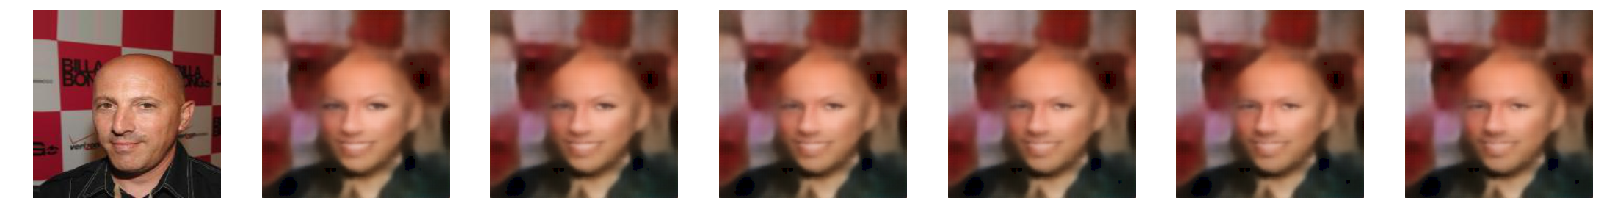

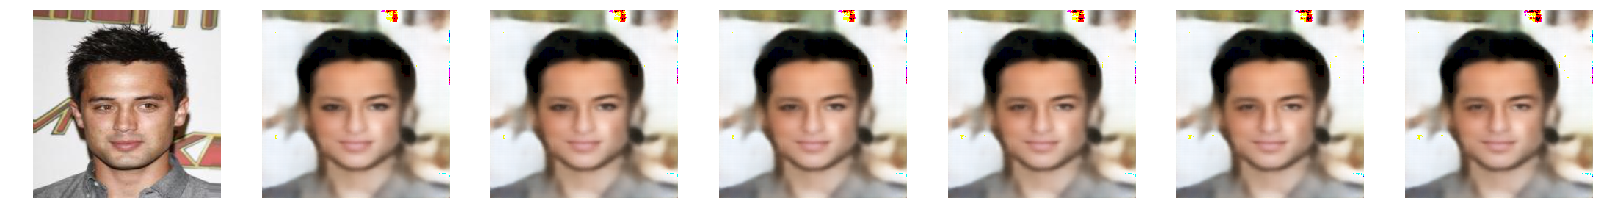

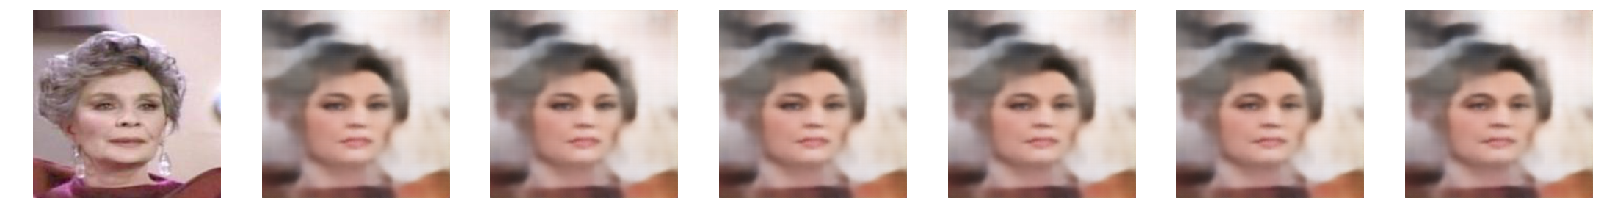

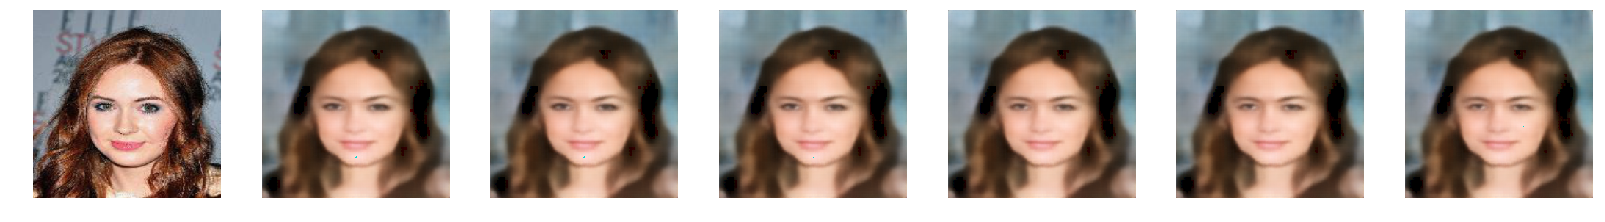

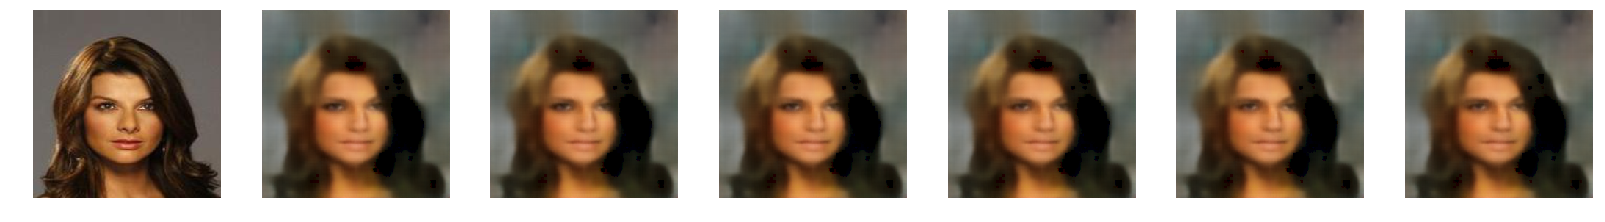

CPU times: user 16.6 s, sys: 469 ms, total: 17.1 s
Wall time: 9.7 s


In [5]:
%%time

change_gender(AE, dataloader)